 38. Price Optimization

 ● Dataset: Retail Price Data

 ● Description: Analyze product pricing strategies to

 optimize revenue for an e-commerce platform.

In [1]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
upload=files.upload()

Saving retail_price (1).csv to retail_price (1).csv


In [4]:
df=pd.read_csv('/content/retail_price (1).csv')
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [5]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [6]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

## 1. Product Information
- product_id: Unique identifier for each product.
- product_category_name: Category to which the product belongs (e.g., "bed_bath_table").
- product_name_lenght: Length of the product name (character count).
- product_description_lenght: Length of the product description (character count).
- product_photos_qty: Number of product images available.
- product_weight_g: Weight of the product in grams.
- product_score: Rating or score assigned to the product (possibly based on customer reviews).
2. Sales & Pricing Information
- month_year: Date in MM-YYYY format indicating when the sale occurred.
- qty: Quantity of the product sold in that month.
- total_price: Total revenue generated from the sale of that product (qty * unit_price).
- freight_price: Cost of shipping or logistics for the product.
- unit_price: Price per unit of the product.
- lag_price: The previous price of the product (useful for analyzing price changes over time).
3. Customer & Demand Data
- customers: Number of unique customers who purchased this product in the given month.
- s: This could be a sales-related metric (possibly sales rank, demand index, or stock status).
- volume: This might represent the total sales volume (e.g., qty * product_weight_g).
4. Time-Based Features
- weekday: Indicates whether the sale happened on a weekday (Monday to Friday).
- weekend: Indicates whether the sale happened on a weekend (Saturday or Sunday).
- holiday: Indicates if the sale happened on a public holiday.
- month: Extracted numerical month from month_year.
year: Extracted year from month_year.
5. Competitor Pricing Information
There are three competitors (comp_1, comp_2, comp_3) with their respective pricing information:

- comp_1: First competitor's price.

- ps1: Price score or rating of the competitor’s price.
- fp1: Freight price of the product from the first competitor.
- comp_2: Second competitor’s price.

- ps2: Price score or rating of the competitor’s price.
- fp2: Freight price of the product from the second competitor.
- comp_3: Third competitor’s price.

- ps3: Price score or rating of the competitor’s price.
- fp3: Freight price of the product from the third competitor.

In [7]:
df.info() ## It will provide how many rows are there  data type if data type is int and float that is numerical data or quantitative columns if that is object means categorical data or qualitative columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

## Observation from above output is
 - there are 3 rows are categorical
 - remaining are numerical
 - It also gives is there any missing value or not but in this there is missing values in each column

In [8]:
## it used to check if any missing exist or not
df.isnull().sum() ## In this no missing value exist ## if missing value exist than drop those columns

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [9]:
#Selecting Only Numerical Columns and display top 5 rows
df.select_dtypes(include = 'number').head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [10]:
## Summary of stats
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


## Average Unit Prices, Number of Customers & Qty Demanded by Product Categories

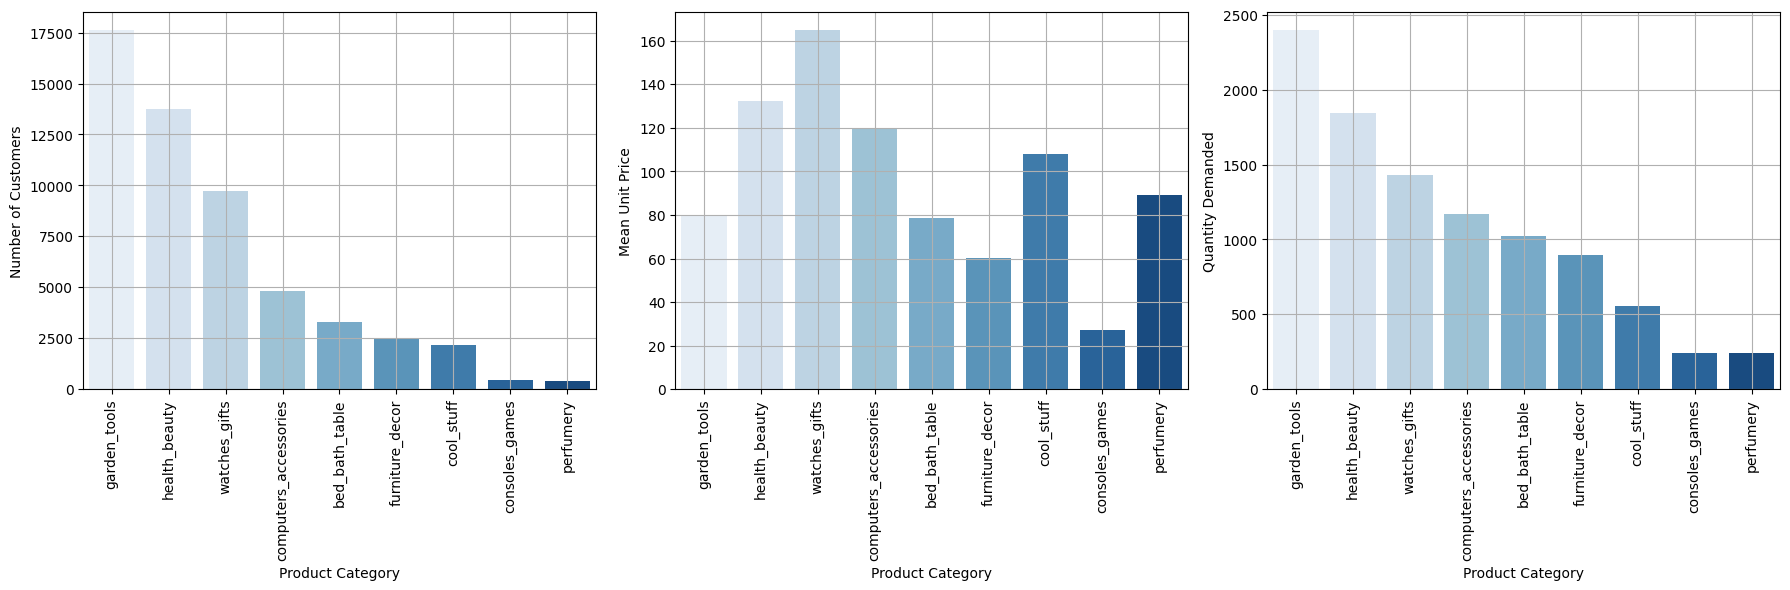

In [12]:
## Visualize sales data across 3  categories
# Group by product category and aggregate
prod_category_df = df.groupby('product_category_name').agg({
    'customers': 'sum',
    'unit_price': 'mean',
    'qty': 'sum'
}).sort_values(by='customers', ascending=False).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plots
sns.barplot(data=prod_category_df, x='product_category_name', y='customers', ax=axes[0], hue='product_category_name', palette="Blues", legend=False)
sns.barplot(data=prod_category_df, x='product_category_name', y='unit_price', ax=axes[1], hue='product_category_name', palette="Blues", legend=False)
sns.barplot(data=prod_category_df, x='product_category_name', y='qty', ax=axes[2], hue='product_category_name', palette="Blues", legend=False)

# Labels
ylabels = ['Number of Customers', 'Mean Unit Price', 'Quantity Demanded']
for idx, ax in enumerate(axes):
    ax.set_ylabel(ylabels[idx])
    ax.set_xlabel('Product Category')
    ax.set_xticks(range(len(prod_category_df)))  # Set correct tick positions
    ax.set_xticklabels(prod_category_df['product_category_name'], rotation=90)  # Apply labels correctly
    ax.grid(True)

plt.tight_layout()
plt.show()



1. Number of Customers (Left Chart)
The Garden Tools category has the highest number of customers.
Health & Beauty and Watches & Gifts categories also have a significant number of customers.
Some categories, like Perfumery and Consoles & Games, have very few customers.

2. Mean Unit Price (Middle Chart)
The Watches & Gifts category has the highest average unit price, followed by Health & Beauty.
Garden Tools has a moderate unit price, even though it has the highest customer count.
Consoles & Games has the lowest unit price compared to other categories.

3. Quantity Demanded (Right Chart)
Garden Tools has the highest quantity demanded, aligning with its high customer count.
Health & Beauty and Watches & Gifts also show strong demand.
Cool Stuff, Consoles & Games, and Perfumery have low quantities sold, indicating lower demand for these products.

## Overall Insights
-  Garden Tools is a highly popular category with high demand and many customers, though its unit price is moderate.

-  Watches & Gifts has the highest unit price, which may indicate premium products or luxury items.

-  Health & Beauty is another strong category with high customer engagement and decent sales volume.

- Consoles & Games & Perfumery have low customer engagement, low demand, and may need strategies like promotions or discounts to improve sales.




















## Average Unit Price and Quantity Demanded for each product ids under product categories

In [13]:
## analyzing individual products within categories instead of just category-level trends.
temp_df = df.groupby(['product_category_name', 'product_id']).agg({
    'unit_price': 'mean',  # compute average unit price
    'qty': 'sum'           # calculate total quatity sold for each product
}).reset_index()

# Rename columns
temp_df.rename(columns={'unit_price': 'avg_unit_price', 'qty': 'qty_demanded'}, inplace=True)


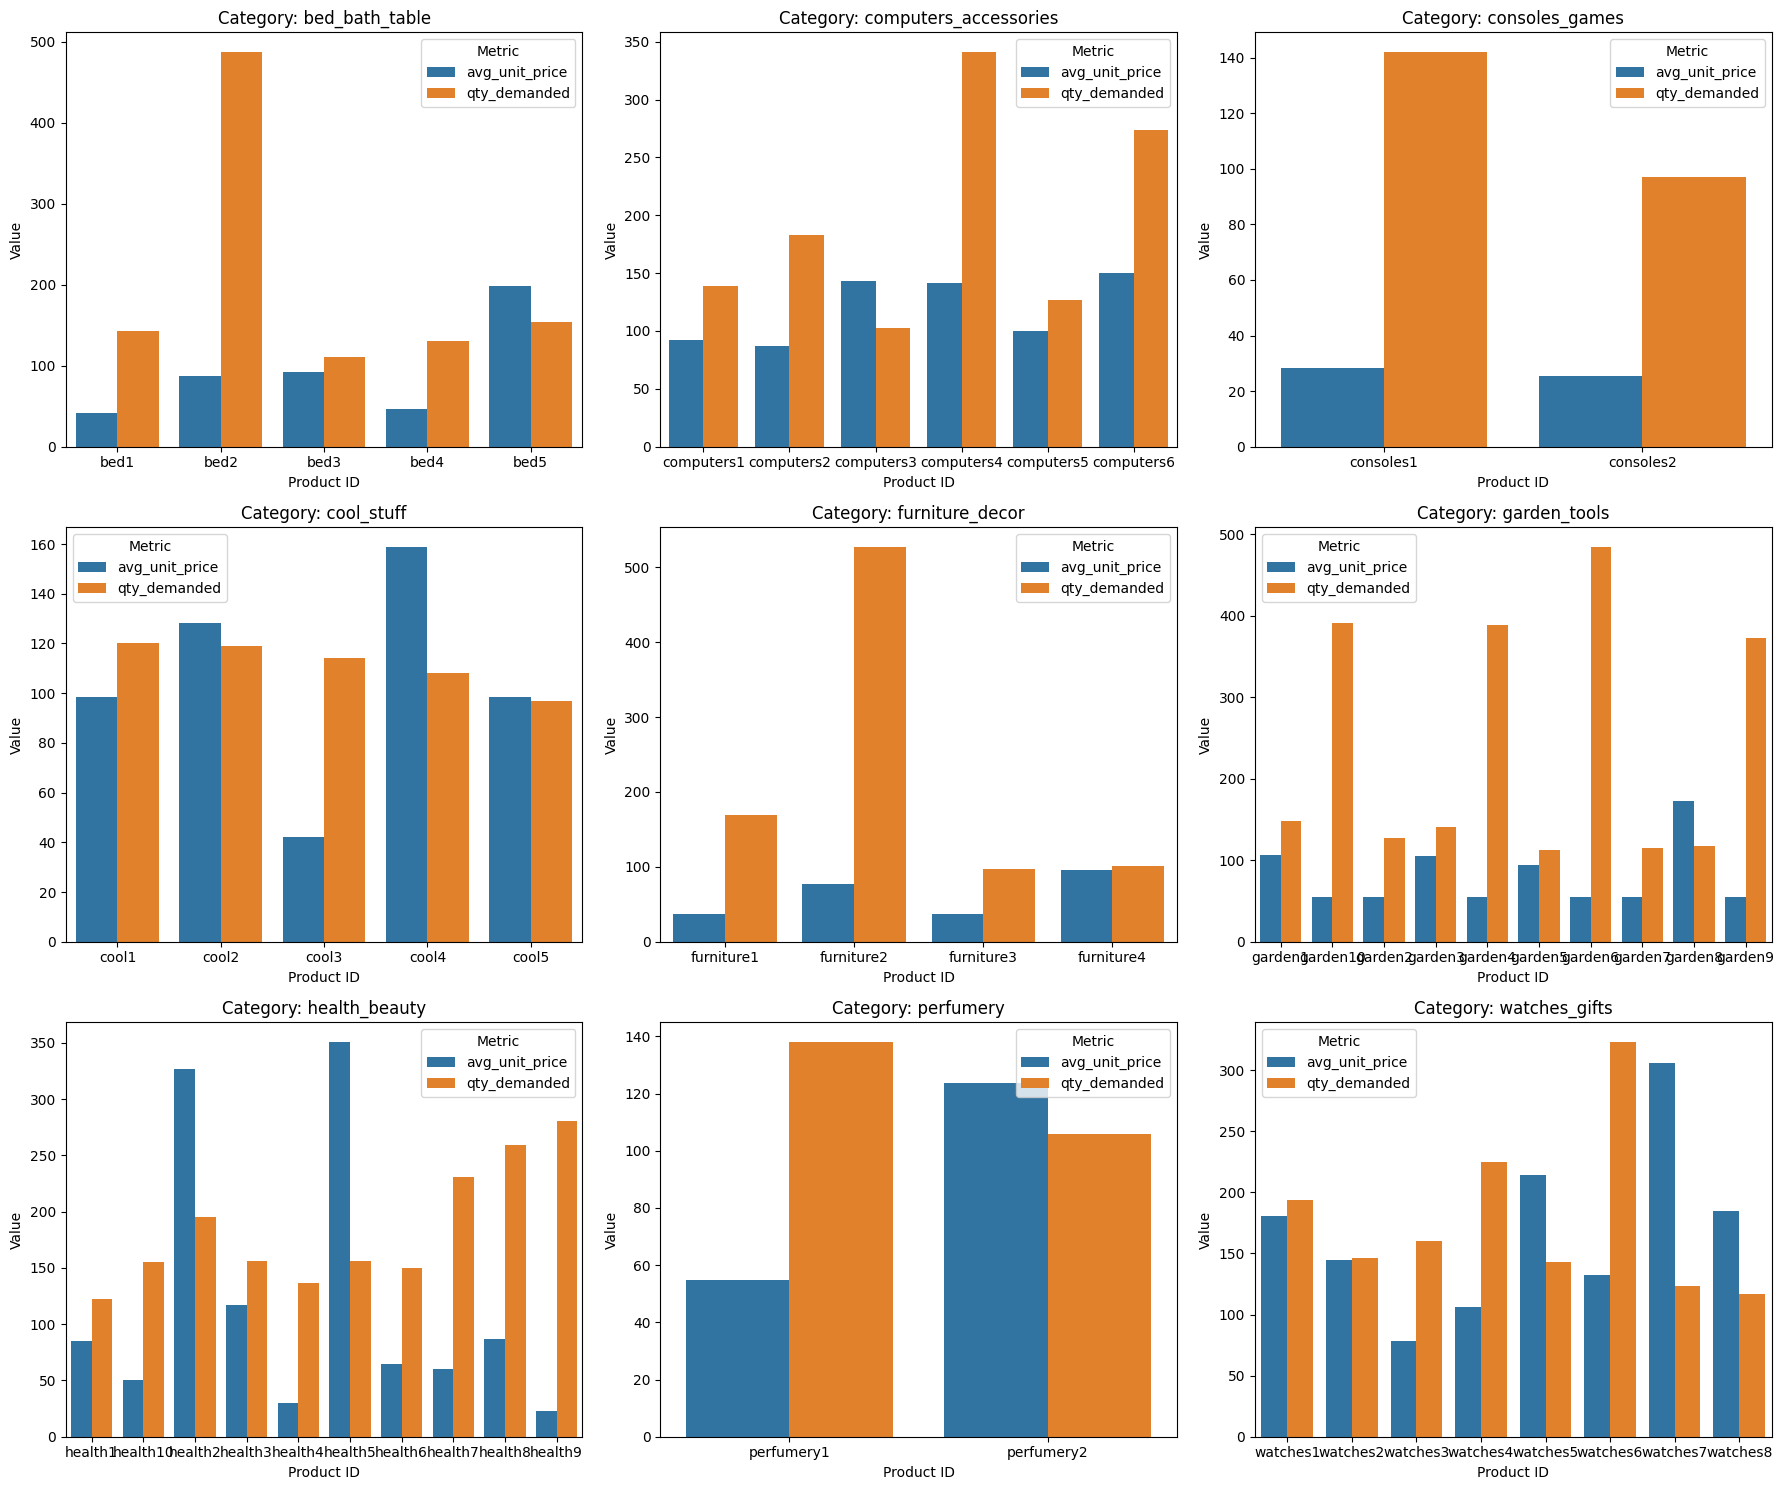

In [14]:
##  Reshaping the Data Using melt()
melted_df = temp_df.melt(id_vars=['product_category_name', 'product_id'], value_vars=['avg_unit_price', 'qty_demanded'], var_name='Metric', value_name='Value')

# Creating subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
# Flattening the 3x3 array to easily iterate over it
axes = axes.flatten()

# Plotting each category in a separate subplot
for i, category in enumerate(melted_df['product_category_name'].unique()):
    category_df = melted_df[melted_df['product_category_name'] == category]
    sns.barplot(ax=axes[i], x='product_id', y='Value', hue='Metric', data=category_df)
    axes[i].set_title(f'Category: {category}')
    axes[i].set_xlabel('Product ID')
    axes[i].set_ylabel('Value')
    axes[i].legend(title='Metric')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## observation from above output is :



1. "Furniture_decor"


One product (furniture2) has extremely high demand compared to others.

2."Health_beauty"

Most products have moderate unit prices but high demand.

Indicates this category is popular among customers.

3. "Consoles_games"

Only two products are available.

One has very high demand, while the other is low.

4. "Garden_tools"

The demand is evenly spread among different products.

Prices seem consistent.

5. "Perfume"

Only two products exist.

One product has very high demand.

6. "Watches_gifts"

Some watches have very high demand, while others are less popular.


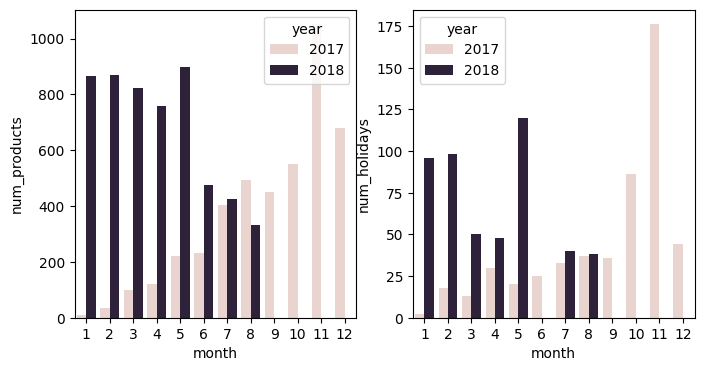

In [15]:
## analyzing and visualizing the relationship between holidays and product quantities over time
##Grouping Data by Year and Month
holiday_by_year_month = df.groupby(['year','month'])[['holiday','qty']].sum().reset_index()
## Renaming Columns
holiday_by_year_month.rename(columns = {'qty':'num_products','holiday':'num_holidays'},inplace = True)
holiday_by_year_month
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(holiday_by_year_month,x= 'month',y='num_products',hue = 'year',ax = axes[0])
sns.barplot(holiday_by_year_month,x= 'month',y='num_holidays',hue = 'year',ax = axes[1])
plt.show()

## observation from above output is



1. Number of Products Sold per Month

2018 (Dark Color) had significantly more products sold than 2017 (Light Color) in the first five months (January to May).

2017 had a sudden spike in November and December, possibly due to holiday season sales.

2.Right Chart: Number of Holidays per Month

May (Month 5) in 2018 had the highest holidays.

November (Month 11) in 2017 had a massive spike in holidays, which might explain the increase in product sales in the left chart.

In some months, the number of holidays was almost the same for both years (e.g., June to September).

## Possible Insights:

- Higher holidays in November 2017 could explain the increase in product sales in that month.

- Early months of 2018 saw more sales despite fewer holidays, possibly due to marketing campaigns.

- Businesses should focus on months with high holidays (e.g., November in 2017 and May in 2018) to boost sales.

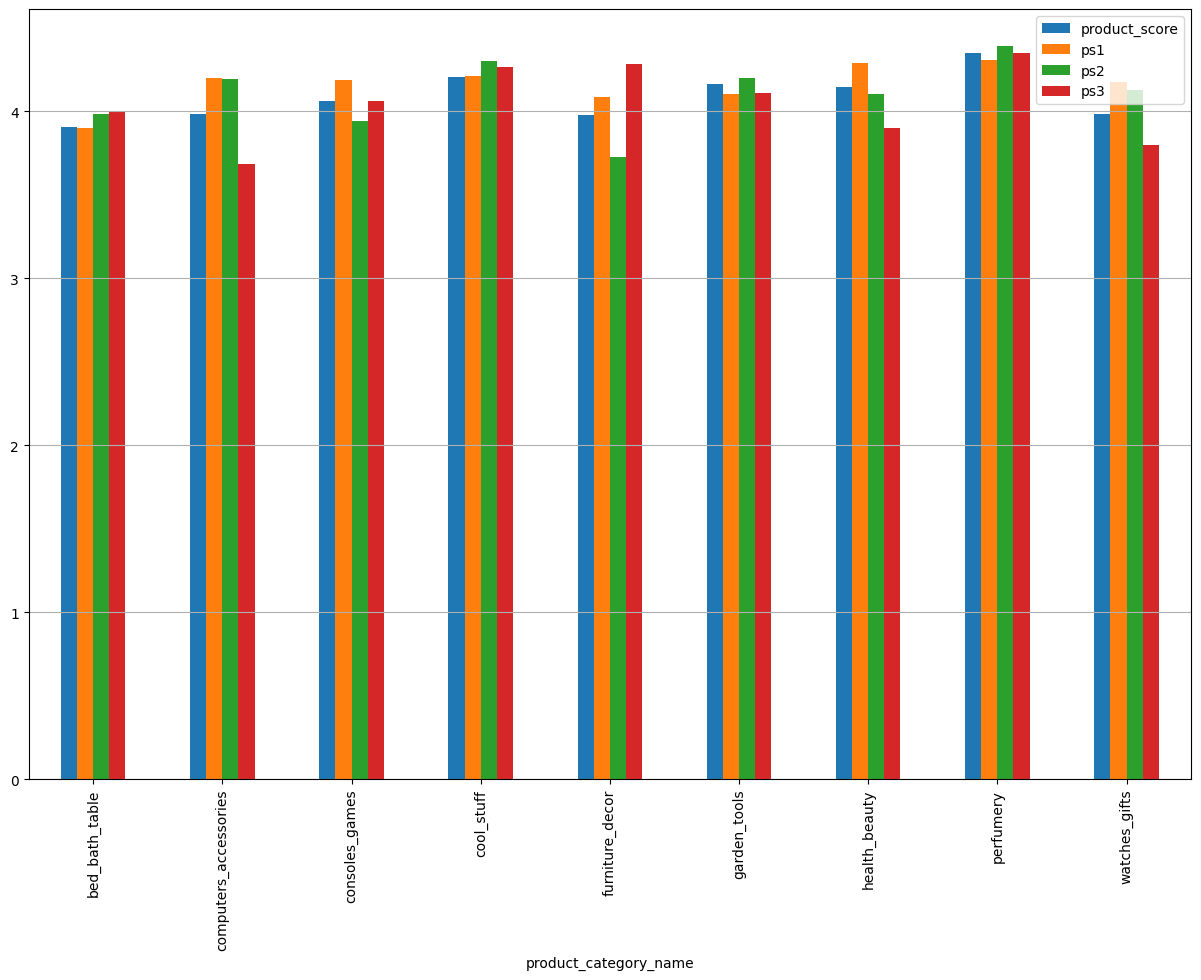

In [16]:
## used to visualize the average ratings for products in different categories.
## Grouping the Data by Product Category and Calculating Mean
product_rating_by_category = df.groupby(['product_category_name'])[['product_score','ps1','ps2','ps3']].mean()
ax = product_rating_by_category.plot(kind ='bar',figsize = (15,10), width = 0.5)
plt.legend(['product_score','ps1','ps2','ps3'],loc = 'upper right')
plt.grid(axis = 'y')
plt.show()

## Observations from the Output:

1. Overall High Product Scores:

Most product categories have average ratings around 4.0 or higher, indicating good customer satisfaction.

2. Slight Variations in Ratings Across Categories:

Some categories, like "computers_accessories", have slightly lower ratings compared to others.

This might indicate customer concerns about quality, usability, or performance.

3 Consistent Scores Across Metrics (ps1, ps2, ps3):

The ratings ps1, ps2, and ps3 are quite close to each other in most categories.
This suggests that different rating criteria or scoring methods give similar results.

4.Some Categories Show Higher Variability:

In categories like "health_beauty" and "watches_gifts", there's a noticeable difference between ps1, ps2, and ps3.

This could indicate that different customers have varying opinions about the products in these categories.

5. Computers & Accessories Have Lower Scores:

The computers_accessories category has the lowest average rating compared to others.

This might be due to technical issues, usability concerns, or high customer expectations in this category.

6 Stable Performance in Most Categories:

Categories like "bed_bath_table", "cool_stuff", and "perfumery" maintain consistent and high ratings, meaning customers are generally satisfied with these products.

## Key Insights for Business Decisions:

- Improve Low-Scoring Categories: Focus on computers_accessories and health_beauty by analyzing customer feedback.

- Maintain Quality in High-Rated Categories: Ensure continued success in bed_bath_table, cool_stuff, and perfumery.

-Investigate Category Variations: Check why some product scores fluctuate across rating metrics (ps1, ps2, ps3)

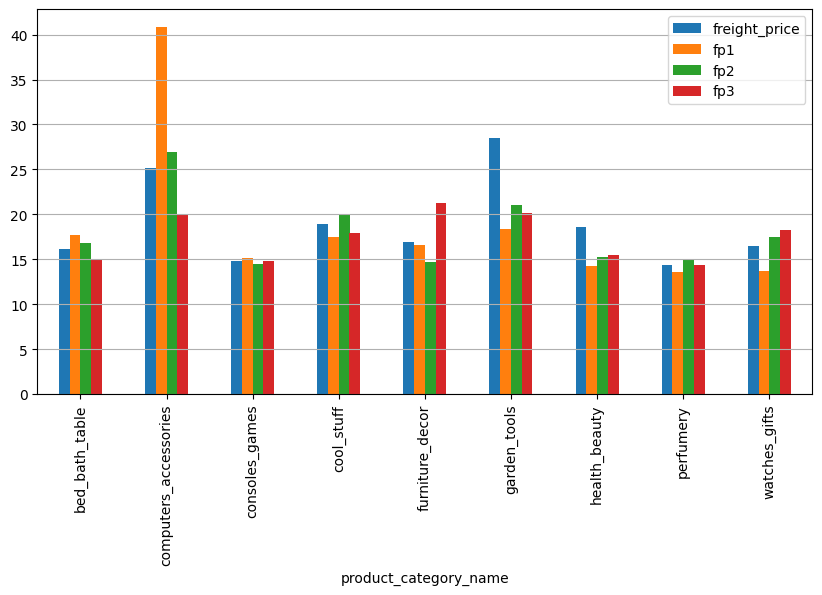

In [17]:
## analyze and visualize the average freight prices
freight_price_by_category = df.groupby(['product_category_name'])[['freight_price','fp1','fp2','fp3']].mean()
ax = freight_price_by_category.plot(kind ='bar',figsize = (10,5), width = 0.5)
plt.legend(['freight_price','fp1','fp2','fp3'],loc = 'upper right')
plt.grid(axis = 'y')
plt.show()

## observation from above output is:
Observations from Output:

- "Computers & Accessories" has the highest freight price (~40+), likely due to heavier or expensive items.

- "Garden Tools" and "Furniture Decor" also have high freight prices, which makes sense as they are bulky.
Most categories have a freight price between 14-22, showing standard shipping costs for most products.
Different fp1, fp2, fp3 values show minor variations, indicating stable freight pricing.
- "Perfumery" and "Health & Beauty" have the lowest freight prices, suggesting they are lightweight and easy to ship.